# Recognition and Localization of Staircases for Visually Impaired People
 

In [8]:
import numpy as np                                    # to perform a wide variety of mathematical operations on arrays.                                             
import pandas as pd                                   # pandas is used to analyze data.

import os                                             # a portable way of using operating system dependent functionality.
import csv                                            # implements classes to read and write tabular data in CSV format.
import cv2                                            # for image processing and performing computer vision tasks.
import pickle                                         # to dump and load data
import seaborn as sns                                 # for making statistical graphics

from skimage.io import imread                         # to read an image 
from skimage.transform import resize                  # It is used to Warp an image according to a given coordinate transformation. 
import matplotlib.pyplot as plt                       # plotting

from sklearn.model_selection import train_test_split  # to split data in training and testing
from sklearn.metrics import classification_report     # to get classification report
import sklearn.metrics as metrics                     # get all metrices functions
from sklearn.metrics import accuracy_score            # to compute accuracy


from sklearn.metrics import confusion_matrix          # to get confusion matrix for testing data
from datetime import datetime                         # to calculate time
from sklearn import linear_model               

from sklearn.cluster import KMeans                    # to import Kmeans Clusterring
from sklearn.model_selection import GridSearchCV      # to import Grid method for training
from sklearn.neighbors import KNeighborsClassifier    # to import KNN
from sklearn.svm import LinearSVC                     # to import SVC with linear kernel
from sklearn.svm import SVC                           # to import SVC
from sklearn.tree import DecisionTreeClassifier       # to import Decision tree classifier
from sklearn.ensemble import RandomForestClassifier   # to import random forest classifier
from sklearn.neighbors import KNeighborsClassifier    
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import KFold    
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import Normalizer          # to normalize sift feature extracted

from sklearn.naive_bayes import GaussianNB

# Preprocessing and feature description

In [2]:
folder1=r"D:\EDAI\Staircase"
folder2=r"D:\EDAI\Pothole"

## ORB Descriptors
### POSITIVE

In [3]:
i=0
for filename in os.listdir(folder1):
    #path
    path=os.path.join(folder1,filename)
    a=cv2.imread(path)
    
    #resize image
    resize=(430,280)
    img=cv2.resize(a,resize)
    
    #gray image
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    #initialise orb descriptor
    orb = cv2.ORB_create()
    keypoints, descriptors = orb.detectAndCompute(gray, None)
    
    #convert the descriptor array into a dataframe format
    out=pd.DataFrame(descriptors)
    print("descriptor shape ",i," : ", out.shape)
    i=i+1
    
    #drop first coloumn as it's the no of feature detected. Not required.
    #append to the csv file
    csv_data=out.to_csv(r'D:\EDAI\SIFT\Staircase.csv', mode='a', header=False,index=False)

descriptor shape  0  :  (461, 32)
descriptor shape  1  :  (447, 32)
descriptor shape  2  :  (500, 32)
descriptor shape  3  :  (475, 32)
descriptor shape  4  :  (455, 32)
descriptor shape  5  :  (483, 32)
descriptor shape  6  :  (500, 32)
descriptor shape  7  :  (493, 32)
descriptor shape  8  :  (84, 32)
descriptor shape  9  :  (484, 32)
descriptor shape  10  :  (499, 32)
descriptor shape  11  :  (478, 32)
descriptor shape  12  :  (492, 32)
descriptor shape  13  :  (489, 32)
descriptor shape  14  :  (483, 32)
descriptor shape  15  :  (454, 32)
descriptor shape  16  :  (500, 32)
descriptor shape  17  :  (391, 32)
descriptor shape  18  :  (441, 32)
descriptor shape  19  :  (490, 32)
descriptor shape  20  :  (177, 32)
descriptor shape  21  :  (495, 32)
descriptor shape  22  :  (450, 32)
descriptor shape  23  :  (500, 32)
descriptor shape  24  :  (488, 32)
descriptor shape  25  :  (412, 32)
descriptor shape  26  :  (471, 32)
descriptor shape  27  :  (500, 32)
descriptor shape  28  :  (500, 

In [4]:
data1 = pd.read_csv(r'D:\EDAI\SIFT\Staircase.csv',header=None,dtype='uint8')
#MemoryError: Unable to allocate 166. MiB for an array with shape (128, 169606) and data type float64,
#Double-precision floating-point format

data1=data1.astype(np.uint8) 
#as unit8 contain 1 byte(8bit) and ranges from 0 to 255
data1

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,125,123,45,36,56,95,87,56,65,236,...,245,12,251,203,101,181,107,189,94,115
1,212,67,95,165,6,10,77,49,36,54,...,69,12,240,227,226,20,36,185,160,32
2,155,44,130,176,193,116,108,199,59,119,...,146,226,185,118,222,235,162,85,186,206
3,35,189,83,80,211,210,170,103,121,193,...,164,238,62,28,22,202,207,134,235,157
4,3,146,25,171,50,139,40,17,46,105,...,77,85,140,148,42,194,28,2,3,117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434937,64,236,156,188,137,233,4,174,190,178,...,211,113,185,150,95,59,144,80,139,10
434938,109,99,197,101,36,14,71,184,96,168,...,205,12,228,235,101,20,106,187,82,32
434939,3,187,59,232,244,133,191,119,15,73,...,34,245,255,221,186,234,24,10,161,251
434940,0,221,31,252,80,196,119,247,181,8,...,16,127,113,190,22,0,48,144,161,43


### ORB NEGATIVE

In [17]:
i=0
for filename in os.listdir(folder2):
    
    path=os.path.join(folder2,filename)
    a=cv2.imread(path)
    
    #resize image
    resize=(430,280)
    img=cv2.resize(a,resize)
    
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    #initialise sift descriptor
    orb = cv2.ORB_create()
    keypoints, descriptors = orb.detectAndCompute(gray, None)
    
    #convert the descriptor array into a dataframe format
    out=pd.DataFrame(descriptors)
    print("descriptor shape ",i," : ", out.shape)
    i=i+1
    #drop first coloumn as it's the no of feature detected. Not required.
    #append to the csv file
    csv_data=out.to_csv(r'D:\EDAI\SIFT\Pothole.csv', mode='a', header=False,index=False)

descriptor shape  0  :  (452, 32)
descriptor shape  1  :  (490, 32)
descriptor shape  2  :  (500, 32)
descriptor shape  3  :  (468, 32)
descriptor shape  4  :  (489, 32)
descriptor shape  5  :  (467, 32)
descriptor shape  6  :  (456, 32)
descriptor shape  7  :  (481, 32)
descriptor shape  8  :  (491, 32)
descriptor shape  9  :  (484, 32)
descriptor shape  10  :  (484, 32)
descriptor shape  11  :  (500, 32)
descriptor shape  12  :  (479, 32)
descriptor shape  13  :  (470, 32)
descriptor shape  14  :  (441, 32)
descriptor shape  15  :  (499, 32)
descriptor shape  16  :  (407, 32)
descriptor shape  17  :  (481, 32)
descriptor shape  18  :  (492, 32)
descriptor shape  19  :  (466, 32)
descriptor shape  20  :  (488, 32)
descriptor shape  21  :  (465, 32)
descriptor shape  22  :  (451, 32)
descriptor shape  23  :  (484, 32)
descriptor shape  24  :  (487, 32)
descriptor shape  25  :  (489, 32)
descriptor shape  26  :  (498, 32)
descriptor shape  27  :  (500, 32)
descriptor shape  28  :  (487,

In [18]:
data2= pd.read_csv(r'D:\EDAI\SIFT\Pothole.csv',header=None,dtype='uint8')
data2=data2.astype(np.uint8)
data2

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,154,154,98,159,115,216,176,101,189,77,...,4,255,86,102,186,131,55,14,61,223
1,116,196,150,183,5,2,68,37,53,146,...,75,200,153,162,214,19,33,106,244,10
2,47,187,224,139,248,181,202,216,87,93,...,125,245,14,93,146,236,223,143,248,213
3,90,75,210,108,35,24,31,128,41,12,...,163,97,176,245,42,139,102,50,7,45
4,42,164,176,184,77,253,144,207,155,55,...,202,211,159,86,90,63,210,76,159,206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
471792,103,152,252,183,239,88,188,140,155,243,...,207,224,12,55,95,243,196,125,137,95
471793,166,4,236,223,236,114,173,27,90,159,...,103,192,79,58,254,129,135,232,253,165
471794,69,22,188,87,174,44,161,19,222,255,...,239,64,77,58,118,212,196,233,149,117
471795,206,232,188,179,253,248,184,136,154,253,...,238,241,205,19,127,255,132,13,15,215


In [19]:
data=data1.append(data2)

C:\Users\hp\AppData\Local\Temp\ipykernel_2544\2617308332.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data=data1.append(data2)


In [20]:
csv_data=data.to_csv(r'D:\EDAI\SIFT\Sift_Final.csv', mode='a', header=False,index=False)

In [21]:
data


,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,125,123,45,36,56,95,87,56,65,236,...,245,12,251,203,101,181,107,189,94,115
1,212,67,95,165,6,10,77,49,36,54,...,69,12,240,227,226,20,36,185,160,32
2,155,44,130,176,193,116,108,199,59,119,...,146,226,185,118,222,235,162,85,186,206
3,35,189,83,80,211,210,170,103,121,193,...,164,238,62,28,22,202,207,134,235,157
4,3,146,25,171,50,139,40,17,46,105,...,77,85,140,148,42,194,28,2,3,117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
471792,103,152,252,183,239,88,188,140,155,243,...,207,224,12,55,95,243,196,125,137,95
471793,166,4,236,223,236,114,173,27,90,159,...,103,192,79,58,254,129,135,232,253,165
471794,69,22,188,87,174,44,161,19,222,255,...,239,64,77,58,118,212,196,233,149,117
471795,206,232,188,179,253,248,184,136,154,253,...,238,241,205,19,127,255,132,13,15,215


# Elbow method

In [9]:
# Find K value in Kmeans :- we will used elbow method
SSE = []                                      # list to store inertia for each value of K

for k in range(1,20):                         # to iterate through k value from 1 to 14
    print(k)                              
    KM_Model = KMeans(n_clusters = k )        # initialize Kmeans clustering model for cluster count of K
    KM_Model.fit(data)                        # fit ORB feature data to KMEans clustering model
    SSE.append(KM_Model.inertia_)             # append inertia to list
    
SSE                                           # print value of inertia

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


[158959574598.52512,
 146373116362.25076,
 138613172813.14627,
 134107016470.37282,
 130923034818.8855,
 128415946233.2142,
 126374342748.30252,
 124550683387.11005,
 122949440869.11526,
 121653075073.07318,
 120492858760.20499,
 119412871345.25696,
 118443292578.40195,
 117537553415.12721,
 116725059324.34567,
 115971180650.9245,
 115257698768.69539,
 114608333042.24362,
 114000068357.4928]

#### Elbow plot

Text(0, 0.5, 'Acc')

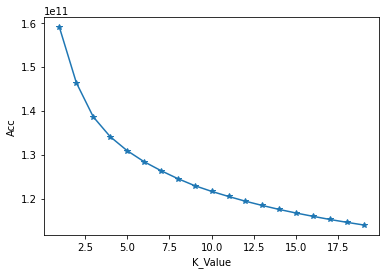

In [10]:
# Plot between Acc and K value.
# X_Axis = K value
# Y_Axis = SSE
import matplotlib.pyplot as plt
plt.plot(range(1,20),SSE,'*-')
plt.xlabel("K_Value")
plt.ylabel("Acc")
# As the steepness between the k value of 7 and 9 changes significantly k value or number of cluster is chosen to be 8.

# Kmeans

In [53]:
kmeans = KMeans(n_clusters=9)
kmeans.fit(data)

ValueError: Expected 2D array, got 1D array instead:
array=[].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [23]:
import pickle

In [24]:
# save the model to disk
filename = 'Kmeans_CL_5_Model.sav'
pickle.dump(kmeans, open(filename, 'wb'))

In [25]:
hist=np.histogram(kmeans.labels_,bins=[0,1,2,3,4,5,6,7,8,9])


print('histogram of trained kmeans')
print(hist,"\n")

histogram of trained kmeans
(array([109884, 101894, 101366, 117574,  87047,  98024, 100806,  95273,
        94871], dtype=int64), array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])) 



In [26]:
#folder1=r"D:/StrData/Str"
#folder2=r"D:\StrData\Nstr"

# Predicting and normalizing predictions

### Positive predictions

In [27]:
#performing kmeans prediction of the entire Staircase dataset with the pretrained kmeans model

#initialising i=0; as its the first class
i=0
j=0
data=[]
k=0

for filename in os.listdir(folder1):
    #path
    path=os.path.join(folder1,filename)
    a=cv2.imread(path)
    
    #resize image
    resize=(430,280)
    img=cv2.resize(a,resize)
    
    #gray image
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    orb = cv2.ORB_create()
    
    keypoints, descriptors = orb.detectAndCompute(gray, None)
    out=pd.DataFrame(descriptors)
    
    #predict values of feature vector with pretrained kmeans
    #ValueError: Buffer dtype mismatch, expected 'float', in order to avoid this dtype=np.double
    
    array_double = np.array(out, dtype=np.double)
    a=kmeans.predict(array_double)
    
    j=j+1
    hist=np.histogram(a,bins=[0,1,2,3,4,5,6,7,8,9])
    print("feature vector of  ",j," : ", hist[0])
    
    #append the dataframe into the array in append mode, the array will only have 5 values which will store the values in a row
    data.append(hist[0])
    k=k+1
    
norm = Normalizer()
normalized = norm.fit_transform(data)                   # normalize the histogram 

#convert Array to Dataframe and append to the list
Output = pd.DataFrame(data)
#add row class 
Output["Class"] = i 
csv_data=Output.to_csv('D:\EDAI\SIFT\kmeans_stair.csv', mode='a',header=False,index=False)

feature vector of   1  :  [35 51 51 49 66 93 45 41 30]
feature vector of   2  :  [ 37  35  44  28  28  66  43  46 120]
feature vector of   3  :  [ 89  47 148  31  29  30  28  52  46]
feature vector of   4  :  [53 64 26 57 39 81 53 37 65]
feature vector of   5  :  [36 93 27 80 28 39 54 35 63]
feature vector of   6  :  [ 28  70  43  43  18  42  71  36 132]
feature vector of   7  :  [48 57 55 43 65 58 47 86 41]
feature vector of   8  :  [58 64 45 64 55 53 69 63 22]
feature vector of   9  :  [18  7 14  5  8 10  3 14  5]
feature vector of   10  :  [ 62  58  70  24  50  36  23  45 116]
feature vector of   11  :  [65 55 67 42 63 51 48 76 32]
feature vector of   12  :  [71 56 66 40 41 41 15 70 78]
feature vector of   13  :  [93 36 71 63 38 46 37 56 52]
feature vector of   14  :  [65 54 43 70 39 47 64 57 50]
feature vector of   15  :  [91 49 55 71 29 45 37 57 49]
feature vector of   16  :  [70 66 40 39 38 40 49 43 69]
feature vector of   17  :  [69 40 69 44 51 55 34 81 57]
feature vector of   1

### Neagtive Predictions

In [28]:
#performing kmeans prediction of the entire Non_Staircase dataset with the pretrained kmeans model

#initialising i=1; as its the 2nd class
i=1
j=0
data=[]
k=0
for filename in os.listdir(folder2):
    path=os.path.join(folder2,filename)
    a=cv2.imread(path)
    resize=(430,280)
    img=cv2.resize(a,resize)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    orb = cv2.ORB_create()
    keypoints, descriptors = orb.detectAndCompute(gray, None)
    out=pd.DataFrame(descriptors)
    
    #predict values of feature vector with pretrained kmeans
    #ValueError: Buffer dtype mismatch, expected 'float' but got 'double', in order to avoid this dtype=np.double
    
    array_double = np.array(out, dtype=np.double)
    a=kmeans.predict(array_double)
    
    j=j+1
    hist=np.histogram(a,bins=[0,1,2,3,4,5,6,7,8,9])
    print("feature vector of  ",j," : ", hist[0])
    #append the dataframe into the array in append mode, the array will only have 5 values which will store the values in a row
    data.append(hist[0])
    k=k+1

norm = Normalizer()
normalized = norm.fit_transform(data)                   # normalize 

#convert Array to Dataframe and append to the list
Output = pd.DataFrame(data)
#add row class 
Output["Class"] = i 
csv_data=Output.to_csv('D:\EDAI\SIFT\kmeans_pothole.csv', mode='a',header=False,index=False)

feature vector of   1  :  [56 53 29 70 38 52 63 46 45]
feature vector of   2  :  [59 69 37 63 65 65 38 30 64]
feature vector of   3  :  [59 54 64 85 56 54 58 49 21]
feature vector of   4  :  [77 80 40 40 32 44 25 53 77]
feature vector of   5  :  [76 45 54 85 53 36 65 41 34]
feature vector of   6  :  [ 40  52  24 109  30  70  71  37  34]
feature vector of   7  :  [70 43 81 44 50 56 29 59 24]
feature vector of   8  :  [54 70 24 81 53 48 67 30 54]
feature vector of   9  :  [28 75 16 90 45 65 71 56 45]
feature vector of   10  :  [ 36  39  20 104  40  62 100  27  56]
feature vector of   11  :  [58 59 25 76 41 48 54 77 46]
feature vector of   12  :  [40 72 26 80 51 95 59 14 63]
feature vector of   13  :  [62 56 48 56 45 79 39 20 74]
feature vector of   14  :  [37 54 49 69 54 71 70 40 26]
feature vector of   15  :  [ 61  29 103  26  78  45  23  46  30]
feature vector of   16  :  [40 60 34 74 49 70 63 57 52]
feature vector of   17  :  [41 63 49 54 46 31 34 45 44]
feature vector of   18  :  [34

# Displaying the kmeans predicted data

In [9]:
#Displaying the kmeans predicted data
print("Staircase")
dat1= pd.read_csv(r'D:\EDAI\SIFT\kmeans_stair.csv',header=None)
print(dat1)

Staircase
      0   1    2    3   4   5    6   7    8  9
0    35  51   51   49  66  93   45  41   30  0
1    37  35   44   28  28  66   43  46  120  0
2    89  47  148   31  29  30   28  52   46  0
3    53  64   26   57  39  81   53  37   65  0
4    36  93   27   80  28  39   54  35   63  0
..   ..  ..  ...  ...  ..  ..  ...  ..  ... ..
995  20  53   19  124  31  51  112  30   48  0
996  43  93   41   68  54  43   76  35   33  0
997  33  33   14   70  20  33   61  23   36  0
998  12  17    5   30  11  22   17   5    4  0
999   6  24    9   31   8  27   26   4   13  0

[1000 rows x 10 columns]


In [11]:
print("Pothole")
dat2= pd.read_csv(r'D:\EDAI\SIFT\kmeans_pothole.csv',header=None)
print(dat2)

Pothole
      0   1   2    3   4    5   6   7   8  9
0    56  53  29   70  38   52  63  46  45  1
1    59  69  37   63  65   65  38  30  64  1
2    59  54  64   85  56   54  58  49  21  1
3    77  80  40   40  32   44  25  53  77  1
4    76  45  54   85  53   36  65  41  34  1
..   ..  ..  ..  ...  ..  ...  ..  ..  .. ..
995  34  65  35  110  49   34  47  35  63  1
996  39  72  21   68  54  100  72  18  56  1
997  26  46  23   89  32   45  97  50  58  1
998  75  62  91   27  32   65  55  28  56  1
999  60  32  36   60  39   34  31  55   9  1

[1000 rows x 10 columns]


In [12]:
#appending All classes into 1 csv file
A=dat1.append(dat2)
csv_data=A.to_csv('D:\EDAI\SIFT\FinalFV.csv', mode='a',header=False,index=False)

C:\Users\hp\AppData\Local\Temp\ipykernel_9700\1357937852.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  A=dat1.append(dat2)


In [13]:
A

,0,1,2,3,4,5,6,7,8,9
0,35,51,51,49,66,93,45,41,30,0
1,37,35,44,28,28,66,43,46,120,0
2,89,47,148,31,29,30,28,52,46,0
3,53,64,26,57,39,81,53,37,65,0
4,36,93,27,80,28,39,54,35,63,0
...,...,...,...,...,...,...,...,...,...,...
995,34,65,35,110,49,34,47,35,63,1
996,39,72,21,68,54,100,72,18,56,1
997,26,46,23,89,32,45,97,50,58,1
998,75,62,91,27,32,65,55,28,56,1


In [14]:
x = A.iloc[:,0:9].values

In [15]:
x

array([[ 35,  51,  51, ...,  45,  41,  30],
       [ 37,  35,  44, ...,  43,  46, 120],
       [ 89,  47, 148, ...,  28,  52,  46],
       ...,
       [ 26,  46,  23, ...,  97,  50,  58],
       [ 75,  62,  91, ...,  55,  28,  56],
       [ 60,  32,  36, ...,  31,  55,   9]], dtype=int64)

In [16]:
y = A.iloc[:,9].values

In [17]:
y

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [18]:
from sklearn.preprocessing import StandardScaler
DhoniS = StandardScaler()
x_scaled = DhoniS.fit_transform(x)

In [19]:
x_scaled

array([[-7.60415571e-01,  3.21342460e-03,  1.11142274e-02, ...,
        -2.25305279e-01, -3.51963554e-01, -6.34313562e-01],
       [-6.84152852e-01, -9.66877022e-01, -2.34310353e-01, ...,
        -3.08705345e-01, -8.67909825e-02,  2.63993843e+00],
       [ 1.29867784e+00, -2.39309187e-01,  3.41199770e+00, ...,
        -9.34205842e-01,  2.31416103e-01, -5.22243192e-02],
       ...,
       [-1.10359781e+00, -2.99939840e-01, -9.70584094e-01, ...,
         1.94309644e+00,  1.25347074e-01,  3.84342613e-01],
       [ 7.64838809e-01,  6.70150607e-01,  1.41354040e+00, ...,
         1.91695052e-01, -1.04141224e+00,  3.11581457e-01],
       [ 1.92868416e-01, -1.14876898e+00, -5.14795588e-01, ...,
        -8.09105743e-01,  3.90519645e-01, -1.39830569e+00]])

# Dimensionality reduction using PCA

In [20]:
from sklearn.decomposition import PCA

In [21]:
pca = PCA(n_components=None)
pca.fit(x_scaled)

PCA()

In [22]:
x_pca = pca.transform(x_scaled)

In [23]:
x_pca

array([[ 0.46104737, -1.51350187, -0.97920446, ...,  0.01897087,
         0.19104035,  0.53389328],
       [ 0.16550704,  1.80625232,  1.41635649, ..., -0.35237892,
         0.68123139,  0.49429838],
       [-3.29568258,  0.42829717,  0.6666368 , ..., -0.63524463,
         0.29082692,  1.66118305],
       ...,
       [ 2.30197767,  0.33657955, -0.09425136, ..., -0.31635708,
         0.6136959 ,  0.05245631],
       [-0.67055274,  0.18912908,  0.48719014, ..., -0.52392229,
         0.88614907,  0.68540277],
       [-0.90977074,  0.45403825, -1.37811111, ..., -0.40580912,
        -0.70068841, -0.64192063]])

In [24]:
x_pca = pd.DataFrame(x_pca)

In [25]:
x_pca

,0,1,2,3,4,5,6,7,8
0,0.461047,-1.513502,-0.979204,-1.190762,1.862916,0.260580,0.018971,0.191040,0.533893
1,0.165507,1.806252,1.416356,-0.827634,1.908723,-1.133593,-0.352379,0.681231,0.494298
2,-3.295683,0.428297,0.666637,-0.604769,-1.487134,0.208599,-0.635245,0.290827,1.661183
3,1.343271,-0.220245,0.474473,-1.431682,0.930839,0.163215,-0.353125,-0.141655,-0.323769
4,2.027999,0.439829,1.349463,-0.117174,-0.925026,1.510092,0.553128,-0.857661,0.019587
...,...,...,...,...,...,...,...,...,...
1995,1.578334,0.053381,0.307091,0.552188,-0.802874,-0.219405,1.445208,-1.350458,0.322980
1996,2.638479,-1.140951,-0.214401,-2.256916,1.084220,0.283116,0.257458,0.225595,-0.048791
1997,2.301978,0.336580,-0.094251,1.114171,-0.521160,-0.875160,-0.316357,0.613696,0.052456
1998,-0.670553,0.189129,0.487190,-2.090359,-0.385436,0.595593,-0.523922,0.886149,0.685403


In [26]:
x_pca.shape

(2000, 9)

## Calculating number of components required

In [27]:
print(pca.explained_variance_ratio_) 

[0.35690672 0.21919762 0.12342495 0.08233153 0.06662689 0.05653385
 0.0412662  0.03078089 0.02293136]


In [28]:
pca = PCA(n_components=9) #91.54 % variation explaned
pca.fit(x_scaled)

PCA(n_components=9)

In [29]:
# save the model to disk
filename = 'PCA_3_Model.sav'
pickle.dump(pca, open(filename, 'wb'))

### Reducing the dimensions 

In [30]:
x_pca = pca.transform(x_scaled)

In [31]:
x_pca

array([[ 0.46104737, -1.51350187, -0.97920446, ...,  0.01897087,
         0.19104035,  0.53389328],
       [ 0.16550704,  1.80625232,  1.41635649, ..., -0.35237892,
         0.68123139,  0.49429838],
       [-3.29568258,  0.42829717,  0.6666368 , ..., -0.63524463,
         0.29082692,  1.66118305],
       ...,
       [ 2.30197767,  0.33657955, -0.09425136, ..., -0.31635708,
         0.6136959 ,  0.05245631],
       [-0.67055274,  0.18912908,  0.48719014, ..., -0.52392229,
         0.88614907,  0.68540277],
       [-0.90977074,  0.45403825, -1.37811111, ..., -0.40580912,
        -0.70068841, -0.64192063]])

In [32]:
x_pca.shape

(2000, 9)

In [33]:
print(pca.explained_variance_ratio_) 

[0.35690672 0.21919762 0.12342495 0.08233153 0.06662689 0.05653385
 0.0412662  0.03078089 0.02293136]


In [34]:
x_pca = pd.DataFrame(x_pca)

In [35]:
x_pca

,0,1,2,3,4,5,6,7,8
0,0.461047,-1.513502,-0.979204,-1.190762,1.862916,0.260580,0.018971,0.191040,0.533893
1,0.165507,1.806252,1.416356,-0.827634,1.908723,-1.133593,-0.352379,0.681231,0.494298
2,-3.295683,0.428297,0.666637,-0.604769,-1.487134,0.208599,-0.635245,0.290827,1.661183
3,1.343271,-0.220245,0.474473,-1.431682,0.930839,0.163215,-0.353125,-0.141655,-0.323769
4,2.027999,0.439829,1.349463,-0.117174,-0.925026,1.510092,0.553128,-0.857661,0.019587
...,...,...,...,...,...,...,...,...,...
1995,1.578334,0.053381,0.307091,0.552188,-0.802874,-0.219405,1.445208,-1.350458,0.322980
1996,2.638479,-1.140951,-0.214401,-2.256916,1.084220,0.283116,0.257458,0.225595,-0.048791
1997,2.301978,0.336580,-0.094251,1.114171,-0.521160,-0.875160,-0.316357,0.613696,0.052456
1998,-0.670553,0.189129,0.487190,-2.090359,-0.385436,0.595593,-0.523922,0.886149,0.685403


In [36]:
B=pd.concat([x_pca, pd.DataFrame(y)],axis=1)

In [37]:
B

,0,1,2,3,4,5,6,7,8,0
0,0.461047,-1.513502,-0.979204,-1.190762,1.862916,0.260580,0.018971,0.191040,0.533893,0
1,0.165507,1.806252,1.416356,-0.827634,1.908723,-1.133593,-0.352379,0.681231,0.494298,0
2,-3.295683,0.428297,0.666637,-0.604769,-1.487134,0.208599,-0.635245,0.290827,1.661183,0
3,1.343271,-0.220245,0.474473,-1.431682,0.930839,0.163215,-0.353125,-0.141655,-0.323769,0
4,2.027999,0.439829,1.349463,-0.117174,-0.925026,1.510092,0.553128,-0.857661,0.019587,0
...,...,...,...,...,...,...,...,...,...,...
1995,1.578334,0.053381,0.307091,0.552188,-0.802874,-0.219405,1.445208,-1.350458,0.322980,1
1996,2.638479,-1.140951,-0.214401,-2.256916,1.084220,0.283116,0.257458,0.225595,-0.048791,1
1997,2.301978,0.336580,-0.094251,1.114171,-0.521160,-0.875160,-0.316357,0.613696,0.052456,1
1998,-0.670553,0.189129,0.487190,-2.090359,-0.385436,0.595593,-0.523922,0.886149,0.685403,1


In [39]:
csv_data=B.to_csv('D:\EDAI\SIFT\FinalPCAFV.csv', mode='a',header=False,index=False)

# Training ,Testing & Classification

In [40]:
import pandas as pd  
data= pd.read_csv(r'D:\EDAI\SIFT\FinalPCAFV.csv',header=None)

data

,0,1,2,3,4,5,6,7,8,9
0,0.461047,-1.513502,-0.979204,-1.190762,1.862916,0.260580,0.018971,0.191040,0.533893,0
1,0.165507,1.806252,1.416356,-0.827634,1.908723,-1.133593,-0.352379,0.681231,0.494298,0
2,-3.295683,0.428297,0.666637,-0.604769,-1.487134,0.208599,-0.635245,0.290827,1.661183,0
3,1.343271,-0.220245,0.474473,-1.431682,0.930839,0.163215,-0.353125,-0.141655,-0.323769,0
4,2.027999,0.439829,1.349463,-0.117174,-0.925026,1.510092,0.553128,-0.857661,0.019587,0
...,...,...,...,...,...,...,...,...,...,...
1995,1.578334,0.053381,0.307091,0.552188,-0.802874,-0.219405,1.445208,-1.350458,0.322980,1
1996,2.638479,-1.140951,-0.214401,-2.256916,1.084220,0.283116,0.257458,0.225595,-0.048791,1
1997,2.301978,0.336580,-0.094251,1.114171,-0.521160,-0.875160,-0.316357,0.613696,0.052456,1
1998,-0.670553,0.189129,0.487190,-2.090359,-0.385436,0.595593,-0.523922,0.886149,0.685403,1


In [41]:
#assigning x the columns from 1 to 128 for training
x = data.iloc[:,0:9].values
print("X values")
print(x)

#assigning y with the column "Class" as target variable
y = data.iloc[:,9]
print("Y values")
print(y)

X values
[[ 0.46104737 -1.51350187 -0.97920446 ...  0.01897087  0.19104035
   0.53389328]
 [ 0.16550704  1.80625232  1.41635649 ... -0.35237892  0.68123139
   0.49429838]
 [-3.29568258  0.42829717  0.6666368  ... -0.63524463  0.29082692
   1.66118305]
 ...
 [ 2.30197767  0.33657955 -0.09425136 ... -0.31635708  0.6136959
   0.05245631]
 [-0.67055274  0.18912908  0.48719014 ... -0.52392229  0.88614907
   0.68540277]
 [-0.90977074  0.45403825 -1.37811111 ... -0.40580912 -0.70068841
  -0.64192063]]
Y values
0       0
1       0
2       0
3       0
4       0
       ..
1995    1
1996    1
1997    1
1998    1
1999    1
Name: 9, Length: 2000, dtype: int64


In [42]:
#Dataset split into train and test with 80% Training and 20% Testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.20, random_state=0)

# Classification using 7 classifiers

### 1)Decision Tree Classifier

Decision Tree Results
Train Accuracy: 0.845625
Test Accuracy: 0.5875
Precision Score:  0.5925925925925926
Recall Score:  0.56
True Negative Rate:  0.615
False Positive Rate:  0.385
F2 Score:  0.5662285136501517
F1 Score:  0.5758354755784062
Confusion Matrix: 
[[123  77]
 [ 88 112]]
ROC curve  <sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x000002DA352AA640>


C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


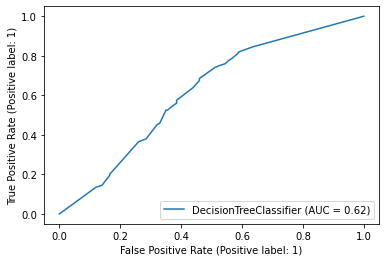

In [43]:
#Decision Tree Classifier
model1 = DecisionTreeClassifier(max_depth=9)
model1.fit(x_train, y_train)
y_pred1 = model1.predict(x_test)
CM = confusion_matrix(y_test, y_pred1)
TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
TNR = TN/(TN+FP) # Specificity or true negative rate
FPR = FP/(FP+TN) # Fall out
print("Decision Tree Results")
print("Train Accuracy:",model1.score(x_train, y_train))
print("Test Accuracy:",model1.score(x_test, y_test))
print("Precision Score: ",metrics.precision_score(y_test, y_pred1))
print("Recall Score: ",metrics.recall_score(y_test, y_pred1)) # true positive rate, Sensitivity
print("True Negative Rate: ", TNR)
print("False Positive Rate: ", FPR)
print("F2 Score: ",metrics.fbeta_score(y_test, y_pred1, beta=2.0))
print("F1 Score: ",metrics.f1_score(y_test, y_pred1))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred1))
print("ROC curve ",metrics.plot_roc_curve(model1,x_test, y_test))
filename = 'DT_Model.pkl'
pickle.dump(model1, open(filename, 'wb'))

### 2)Random Forest Clasifier

Random Forest Clasifier
Train Accuracy: 1.0
Test Accuracy: 0.6225
Precision Score:  0.6172248803827751
Recall Score:  0.645
True Negative Rate:  0.6
False Positive Rate:  0.4
F2 Score:  0.6392467789890981
F1 Score:  0.6308068459657702
Confusion Matrix: 
[[120  80]
 [ 71 129]]
ROC curve  <sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x000002DA35C88910>


C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


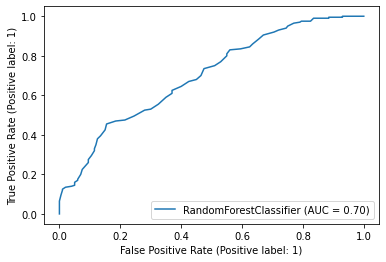

In [44]:
from sklearn.ensemble import RandomForestClassifier

model2 = RandomForestClassifier(n_estimators = 100)
model2.fit(x_train, y_train)
y_pred2 = model2.predict(x_test)
CM = confusion_matrix(y_test, y_pred2)
TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
TNR = TN/(TN+FP) # Specificity or true negative rate
FPR = FP/(FP+TN) # Fall out or false positive rate

print("Random Forest Clasifier")
print("Train Accuracy:",model2.score(x_train, y_train))
print("Test Accuracy:",model2.score(x_test, y_test))
print("Precision Score: ",metrics.precision_score(y_test, y_pred2))
print("Recall Score: ",metrics.recall_score(y_test, y_pred2)) #True positive rate
print("True Negative Rate: ", TNR)
print("False Positive Rate: ", FPR)
print("F2 Score: ",metrics.fbeta_score(y_test, y_pred2, beta=2.0))
print("F1 Score: ",metrics.f1_score(y_test, y_pred2))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred2))
print("ROC curve ",metrics.plot_roc_curve(model2,x_test, y_test))
filename = 'RF_Model.pkl'
pickle.dump(model2, open(filename, 'wb'))

### 3)KNN

KNN
Train Accuracy: 0.686875
Test Accuracy: 0.5775
Precision Score:  0.5603112840466926
Recall Score:  0.72
True Negative Rate:  0.435
False Positive Rate:  0.565
F2 Score:  0.6811731315042574
F1 Score:  0.6301969365426695
Confusion Matrix: 
[[ 87 113]
 [ 56 144]]
ROC curve  <sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x000002DA35C82040>


C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


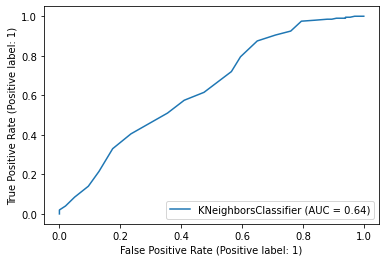

In [45]:
from sklearn.neighbors import KNeighborsClassifier
model3 = KNeighborsClassifier(n_neighbors = 29)
model3.fit(x_train, y_train)
y_pred3 = model3.predict(x_test)
CM = confusion_matrix(y_test, y_pred3)
TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
TNR = TN/(TN+FP) # Specificity or true negative rate
FPR = FP/(FP+TN)
print("KNN")
print("Train Accuracy:",model3.score(x_train, y_train))
print("Test Accuracy:",model3.score(x_test, y_test))
print("Precision Score: ",metrics.precision_score(y_test, y_pred3))
print("Recall Score: ",metrics.recall_score(y_test, y_pred3))
print("True Negative Rate: ", TNR)
print("False Positive Rate: ", FPR)
print("F2 Score: ",metrics.fbeta_score(y_test, y_pred3, beta=2.0))
print("F1 Score: ",metrics.f1_score(y_test, y_pred3))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred3))
print("ROC curve ",metrics.plot_roc_curve(model3,x_test, y_test))
filename = 'KNN_Model.pkl'
pickle.dump(model3, open(filename, 'wb'))

### 4)NAIVE BAYES CLASSIFIER

NAIVE BAYES CLASSIFIER
Train Accuracy: 0.643125
Test Accuracy: 0.61
Precision Score:  0.582089552238806
Recall Score:  0.78
True Negative Rate:  0.44
False Positive Rate:  0.56
F2 Score:  0.7303370786516855
F1 Score:  0.6666666666666667
Confusion Matrix: 
[[ 88 112]
 [ 44 156]]
ROC curve  <sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x000002DA306E63A0>


C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


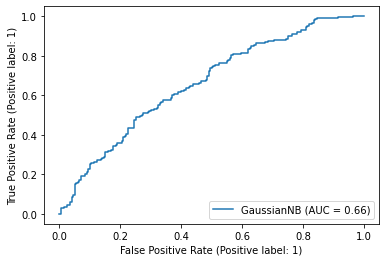

In [46]:
from sklearn.naive_bayes import GaussianNB
model4 = GaussianNB()
model4.fit(x_train, y_train)
y_pred4 = model4.predict(x_test)
CM = confusion_matrix(y_test, y_pred4)
TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
TNR = TN/(TN+FP) # Specificity or true negative rate
FPR = FP/(FP+TN)
print("NAIVE BAYES CLASSIFIER")
print("Train Accuracy:",model4.score(x_train, y_train))
print("Test Accuracy:",model4.score(x_test, y_test))
print("Precision Score: ",metrics.precision_score(y_test, y_pred4))
print("Recall Score: ",metrics.recall_score(y_test, y_pred4))
print("True Negative Rate: ", TNR)
print("False Positive Rate: ", FPR)
print("F2 Score: ",metrics.fbeta_score(y_test, y_pred4, beta=2.0))
print("F1 Score: ",metrics.f1_score(y_test, y_pred4))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred4))
print("ROC curve ",metrics.plot_roc_curve(model4,x_test, y_test))
filename = 'NB_Model.pkl'
pickle.dump(model4, open(filename, 'wb'))

### 5)Logistic Regression

NAIVE BAYES CLASSIFIER
Train Accuracy: 0.614375
Test Accuracy: 0.5825
Precision Score:  0.576036866359447
Recall Score:  0.625
True Negative Rate:  0.44
False Positive Rate:  0.56
F2 Score:  0.6145526057030481
F1 Score:  0.5995203836930455
Confusion Matrix: 
[[108  92]
 [ 75 125]]
ROC curve  <sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x000002DA35E88400>


C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


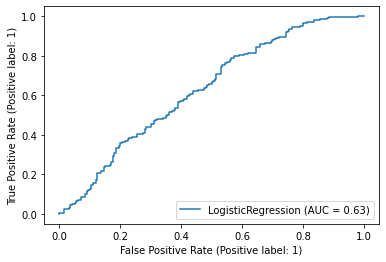

In [47]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(multi_class='multinomial', random_state=1)
LR.fit(x_train, y_train)
y_LR = LR.predict(x_test)
CM = confusion_matrix(y_test, y_pred4)
TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
TNR = TN/(TN+FP) # Specificity or true negative rate
FPR = FP/(FP+TN)
print("NAIVE BAYES CLASSIFIER")
print("Train Accuracy:",LR.score(x_train, y_train))
print("Test Accuracy:",LR.score(x_test, y_test))
print("Precision Score: ",metrics.precision_score(y_test, y_LR))
print("Recall Score: ",metrics.recall_score(y_test, y_LR))
print("True Negative Rate: ", TNR)
print("False Positive Rate: ", FPR)
print("F2 Score: ",metrics.fbeta_score(y_test, y_LR, beta=2.0))
print("F1 Score: ",metrics.f1_score(y_test, y_LR))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_LR))
print("ROC curve ",metrics.plot_roc_curve(LR,x_test, y_test))
filename = 'LR_Model.pkl'
pickle.dump(LR, open(filename, 'wb'))

### 6)SVM Linear kernel

SVM Linear kernel
Train Accuracy: 0.626875
Test Accuracy: 0.615
Precision Score:  0.6
Recall Score:  0.69
True Negative Rate:  0.54
False Positive Rate:  0.46
F2 Score:  0.6699029126213591
F1 Score:  0.641860465116279
Confusion Matrix: 
[[108  92]
 [ 62 138]]
ROC curve  <sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x000002DA35E19610>


C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


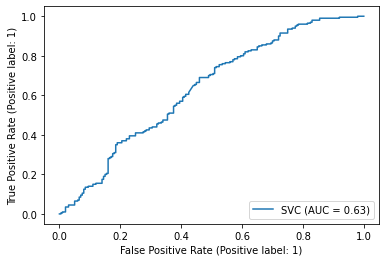

In [48]:
from sklearn import svm
model5 = svm.SVC(kernel='linear', probability=True)
model5.fit(x_train, y_train)
y_pred5 = model5.predict(x_test)
CM = confusion_matrix(y_test, y_pred5)
TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
TNR = TN/(TN+FP) # Specificity or true negative rate
FPR = FP/(FP+TN)
print("SVM Linear kernel")
print("Train Accuracy:",model5.score(x_train, y_train))
print("Test Accuracy:",model5.score(x_test, y_test))
print("Precision Score: ",metrics.precision_score(y_test, y_pred5))
print("Recall Score: ",metrics.recall_score(y_test, y_pred5))
print("True Negative Rate: ", TNR)
print("False Positive Rate: ", FPR)
print("F2 Score: ",metrics.fbeta_score(y_test, y_pred5, beta=2.0))
print("F1 Score: ",metrics.f1_score(y_test, y_pred5))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred5))
print("ROC curve ",metrics.plot_roc_curve(model5,x_test, y_test))
filename = 'SVML_Model.pkl'
pickle.dump(model5, open(filename, 'wb'))

### 7)SVM Polynomial

SVM Polynomial
Train Accuracy: 0.668125
Test Accuracy: 0.6125
Precision Score:  0.5728155339805825
Recall Score:  0.885
True Negative Rate:  0.34
False Positive Rate:  0.66
F2 Score:  0.7980162308385934
F1 Score:  0.6954813359528487
Confusion Matrix: 
[[ 68 132]
 [ 23 177]]
ROC curve  <sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x000002DA35C21B80>


C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


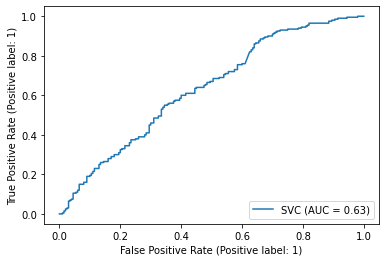

In [49]:
model6 = svm.SVC(kernel='poly', degree=3, probability=True)
model6.fit(x_train, y_train)
y_pred6 = model6.predict(x_test)
CM = confusion_matrix(y_test, y_pred6)
TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
TNR = TN/(TN+FP) # Specificity or true negative rate
FPR = FP/(FP+TN)
print("SVM Polynomial")
print("Train Accuracy:",model6.score(x_train, y_train))
print("Test Accuracy:",model6.score(x_test, y_test))
print("Precision Score: ",metrics.precision_score(y_test, y_pred6))
print("Recall Score: ",metrics.recall_score(y_test, y_pred6))
print("True Negative Rate: ", TNR)
print("False Positive Rate: ", FPR)
print("F2 Score: ",metrics.fbeta_score(y_test, y_pred6,beta=2.0))
print("F1 Score: ",metrics.f1_score(y_test, y_pred6))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred6))
print("ROC curve ",metrics.plot_roc_curve(model6,x_test, y_test))
filename = 'SVMP_Model.pkl'
pickle.dump(model6, open(filename, 'wb'))

### 8)SVM sigmoid

SVM sigmoid
Train Accuracy: 0.548125
Test Accuracy: 0.5625
Precision Score:  0.5621890547263682
Recall Score:  0.565
True Negative Rate:  0.56
False Positive Rate:  0.44
F2 Score:  0.5644355644355644
F1 Score:  0.5635910224438903
Confusion Matrix: 
[[112  88]
 [ 87 113]]
ROC curve  <sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x000002DA36F61BB0>


C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


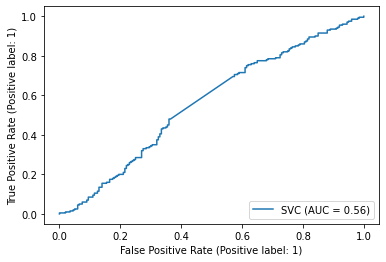

In [50]:
model7 = svm.SVC(kernel='sigmoid', probability=True)
model7.fit(x_train, y_train)
y_pred7 = model7.predict(x_test)
CM = confusion_matrix(y_test, y_pred7)
TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
TNR = TN/(TN+FP) # Specificity or true negative rate
FPR = FP/(FP+TN)
print("SVM sigmoid")
print("Train Accuracy:",model7.score(x_train, y_train))
print("Test Accuracy:",model7.score(x_test, y_test))
print("Precision Score: ",metrics.precision_score(y_test, y_pred7))
print("Recall Score: ",metrics.recall_score(y_test, y_pred7))
print("True Negative Rate: ", TNR)
print("False Positive Rate: ", FPR)
print("F2 Score: ",metrics.fbeta_score(y_test, y_pred7, beta=2.0))
print("F1 Score: ",metrics.f1_score(y_test, y_pred7))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred7))
print("ROC curve ",metrics.plot_roc_curve(model7,x_test, y_test))
filename = 'SVMS_Model.pkl'
pickle.dump(model7, open(filename, 'wb'))

### 9)SVM rbf

SVM rbf
Train Accuracy: 0.7325
Test Accuracy: 0.61
Precision Score:  0.5948275862068966
Recall Score:  0.69
True Negative Rate:  0.53
False Positive Rate:  0.47
F2 Score:  0.6686046511627907
F1 Score:  0.6388888888888888
Confusion Matrix: 
[[106  94]
 [ 62 138]]


C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


ROC curve  <sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x000002DA35E0CDC0>


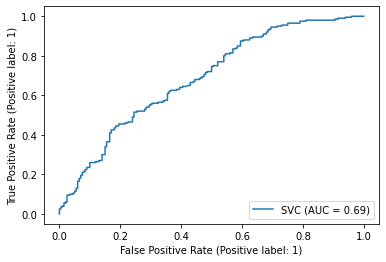

In [51]:
model8 = svm.SVC(kernel='rbf', probability=True)
model8.fit(x_train, y_train)
y_pred8 = model8.predict(x_test)
CM = confusion_matrix(y_test, y_pred8)
TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
TNR = TN/(TN+FP) # Specificity or true negative rate
FPR = FP/(FP+TN)
print("SVM rbf")
print("Train Accuracy:",model8.score(x_train, y_train))
print("Test Accuracy:",model8.score(x_test, y_test))
print("Precision Score: ",metrics.precision_score(y_test, y_pred8))
print("Recall Score: ",metrics.recall_score(y_test, y_pred8))
print("True Negative Rate: ", TNR)
print("False Positive Rate: ", FPR)
print("F2 Score: ",metrics.fbeta_score(y_test, y_pred8,beta=2.0))
print("F1 Score: ",metrics.f1_score(y_test, y_pred8))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred8))
print("ROC curve ",metrics.plot_roc_curve(model8,x_test, y_test))
filename = 'SVMR_Model.pkl'
pickle.dump(model8, open(filename, 'wb'))

## Single Image Detection

In [52]:
#Recognition &Validation
#Assigning path with any any class image
data=[]
path=r"D:\EDAI\Pothole\1.jpg"


#Repeated the process of image pre-processing and feature extraction
a=cv2.imread(path)
resize=(430,280)

#resize image
img=cv2.resize(a,resize)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#initialise sift descriptor
orb = cv2.ORB_create()
keypoints, descriptors = orb.detectAndCompute(gray, None)

#convert the descriptor array into a dataframe format
out=pd.DataFrame(descriptors)
print("Descriptor Shape:",out.shape)

#initialise Kmeans and create 5 clusters


#train the model for the features i.e. for all elements in the Dataframe
array_double = np.array(out, dtype=np.double)
a=kmeans.predict(array_double)

#get the values of the histogram for one image only for 5 clusters i.e. in 5 bins
#kmeans.labels_ give us the label vlaue of the feature that its clustered into
#hist will give the hostogram for all those vlaues
hist=np.histogram(a,bins=[0,1,2,3,4,5,6,7,8,9])

#append the dataframe into the array in append mode, the array will only have 5 values which will store the values in a row
data.append(hist[0])

Output = pd.DataFrame(data)
print("Histogram:\n",Output)

Descriptor Shape: (452, 32)


NameError: name 'kmeans' is not defined

In [175]:
from sklearn.preprocessing import StandardScaler
MuktaS = StandardScaler()
Mukta = MuktaS.fit_transform(Output)

In [176]:
Mukta

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [177]:
Mukta.shape

(1, 13)

In [178]:
MB = pca.transform(Mukta)

In [179]:
MB.shape

(1, 9)

In [180]:
MB

array([[-2.04586911e-16,  1.76612202e-17, -1.19836575e-16,
        -2.28642014e-17,  3.37501797e-17, -7.19008797e-17,
        -2.05072347e-16,  1.65945395e-16,  1.07175000e-16]])

In [181]:
pickle_in = open('RFC.sav', 'rb')
model1 = pickle.load(pickle_in )
pickle_in.close()

C:\Users\Samrat\anaconda3\lib\site-packages\sklearn\base.py:310: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
C:\Users\Samrat\anaconda3\lib\site-packages\sklearn\base.py:310: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.0.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


In [182]:
#prediction
y_pred1 = model1.predict(MB)

#prints the prediction of the class
print(y_pred1)

[1]


In [183]:
from sklearn.svm import SVC
DhoniSVM_LK = SVC(kernel='rbf')
Dhoni_LK = DhoniSVM_LK.fit(x_train, y_train)

In [184]:
filename = 'SVC_RBF_PCA_3.sav'
pickle.dump(Dhoni_LK, open(filename, 'wb'))

In [185]:
Dhoni_LK

SVC()

In [186]:
y_pred_LK = Dhoni_LK.predict(x_test)

In [187]:
y_pred_LK

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [188]:
from sklearn.metrics import confusion_matrix

In [189]:
confusion_matrix(y_test, y_pred_LK)

array([[438, 174],
       [ 80, 509]], dtype=int64)

In [190]:
from sklearn.metrics import accuracy_score

In [191]:
accuracy_score(y_test, y_pred_LK)

0.7885095753538718

In [192]:
y_pred1 = model1.predict(MB)

#prints the prediction of the class
print(y_pred1)

[1]


# Classification using Voting classifiers

In [21]:
from sklearn.naive_bayes import GaussianNB
# importing libraries
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


# group / ensemble of models
estimator = []
estimator.append(('RFC',RandomForestClassifier(max_depth=13, n_estimators=170)))
estimator.append(('SVC', SVC(gamma ='auto', probability = True)))
estimator.append(('DTC', DecisionTreeClassifier()))
estimator.append(('KNN', KNeighborsClassifier(n_neighbors=30)))
estimator.append(('NBC', GaussianNB()))


# Voting Classifier with hard voting
vot_hard = VotingClassifier(estimators = estimator, voting ='hard')
vot_hard.fit(x_train, y_train)
y_pred = vot_hard.predict(x_test)
accuracy = vot_hard.score(x_test,y_test)
print(y_pred)
print(accuracy)

# group / ensemble of models
estimator = []
estimator.append(('RFC',RandomForestClassifier(max_depth=13, n_estimators=170)))
estimator.append(('SVC', SVC(gamma ='auto', probability = True)))
estimator.append(('DTC', DecisionTreeClassifier()))
estimator.append(('KNN', KNeighborsClassifier(n_neighbors=30)))
estimator.append(('NBC', GaussianNB()))


# Voting Classifier with soft voting
vot_soft = VotingClassifier(estimators = estimator, voting ='soft')
vot_soft.fit(x_train, y_train)
y_pred = vot_soft.predict(x_test)
accuracy = vot_soft.score(x_test,y_test)
print(y_pred)
print(accuracy)

[1 0 0 ... 0 0 0]
0.7835137385512073
[1 0 0 ... 1 0 0]
0.7660283097418817


## Testing And Validation of multiple Images

In [194]:
import numpy as np
from sklearn.metrics import confusion_matrix
import itertools
import shutil
import random
import glob
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline
import pandas as pd              
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt  
import PIL       
import PIL.Image
import os       
import os.path
from PIL import Image
import cv2 as cv
import cv2
from scipy.stats import stats
import pickle
from sklearn. model_selection import train_test_split
from sklearn.svm import SVC
import math
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer   # to normalize sift feature extracted 

In [195]:
pickle_in = open('RFC.sav', 'rb')
model = pickle.load(pickle_in )
pickle_in.close()

C:\Users\Samrat\anaconda3\lib\site-packages\sklearn\base.py:310: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
C:\Users\Samrat\anaconda3\lib\site-packages\sklearn\base.py:310: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.0.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


In [196]:
pickle_in = open('Kmeans_CL_5_Model.sav', 'rb')
kmeans = pickle.load(pickle_in )
pickle_in.close()

C:\Users\Samrat\anaconda3\lib\site-packages\sklearn\base.py:310: UserWarning: Trying to unpickle estimator KMeans from version 1.0.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


In [197]:
#load previously dumped hog image dataset 
pickle_in = open('PCA_3_Model.sav', 'rb')
pca = pickle.load(pickle_in )
pickle_in.close()

C:\Users\Samrat\anaconda3\lib\site-packages\sklearn\base.py:310: UserWarning: Trying to unpickle estimator PCA from version 1.0.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


In [131]:
b=r'C:\Users\Samrat\Desktop\CV-PreProcessing\testing-img'
data =[]
for filename in os.listdir(b):
    
    path=os.path.join(b,filename)
    a=cv2.imread(path)
    
    #resize imageAC
    resize=(430,280)
    img=cv2.resize(a,resize)
    
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    #initialise sift descriptor
    orb = cv2.ORB_create()
    keypoints, descriptors = orb.detectAndCompute(gray, None)

    #convert the descriptor array into a dataframe format
    out=pd.DataFrame(descriptors)
    array_double = np.array(out, dtype=np.double)
#     print(out)

    a=kmeans.predict(array_double) 
    hist=np.histogram(a,bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13])
    data.append(hist[0])
    Output = pd.DataFrame(data)
    #print("Histogram:\n",Output)

norm = Normalizer()
normalized = norm.fit_transform(Output)  
normalized.shape# normalize 

Standardize = StandardScaler()
x_scaled = Standardize.fit_transform(normalized)
pd.DataFrame(normalized)
print(x_scaled.shape)


x_pca = pca.transform(x_scaled)
x_pca = pd.DataFrame(x_pca)
x_pca

# First 1000 images are of traffic
#m = x_pca.iloc[:1000,:]
#prediction
y_pred1 = model.predict(x_pca)

#prints the prediction of the class
print(y_pred1)
y_pred1
a=np.count_nonzero(y_pred1==1)
print("Traffic :",a)
a=np.count_nonzero(y_pred1==0)
print("Non Traffic :",a)


(1600, 13)
[1 1 0 ... 1 1 1]
Traffic : 841
Non Traffic : 759
